In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import patsy

In [17]:
happiness = pd.read_csv('happiness.csv')

In [18]:
happiness.head()

,happy,stress,exercise,sleep,freetime
0,7.5,5.6,0,12.6,4
1,1.6,9.8,0,2.9,1
2,6.1,7.4,0,13.8,1
3,4.8,5.6,0,5.0,3
4,8.1,5.2,0,11.0,4


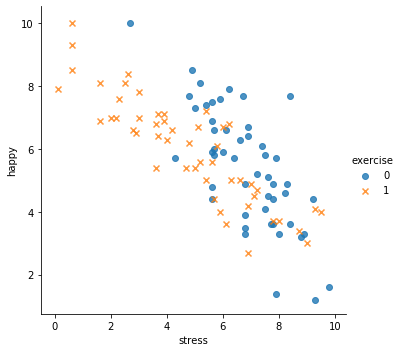

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='stress', y='happy', hue='exercise', markers=['o','x'], fit_reg=False, data=happiness)
plt.show()

In [20]:
import statsmodels.api as sm
model = sm.OLS.from_formula('happy ~ stress + exercise + stress:exercise', data=happiness).fit()
print(model.params)

Intercept          12.053583
stress             -0.971225
exercise           -3.135705
stress:exercise     0.357365
dtype: float64


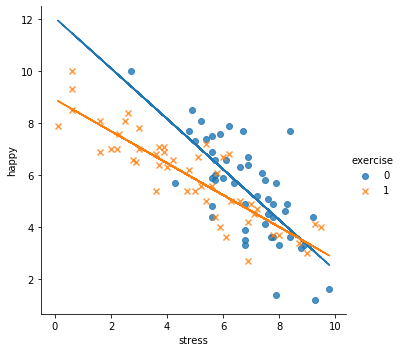

In [21]:
stress = happiness.stress
intercept = model.params[0]
b_stress =  model.params[1]
b_exercise = model.params[2]
b_stress_exercise = model.params[3]
happy_no_ex = intercept + b_stress * stress
happy_yes_ex = intercept+b_exercise +(b_stress+b_stress_exercise)*stress

import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='stress', y='happy', hue='exercise', 
           markers=['o','x'], 
           fit_reg=False, 
           data=happiness)
plt.plot(stress, happy_no_ex)
plt.plot(stress,happy_yes_ex)
plt.show()

In [22]:
modelQ = sm.OLS.from_formula('happy ~ stress + freetime + stress:freetime', data=happiness).fit()
print(modelQ.params)

Intercept          8.099243
stress            -0.552115
freetime           0.119443
stress:freetime    0.042087
dtype: float64


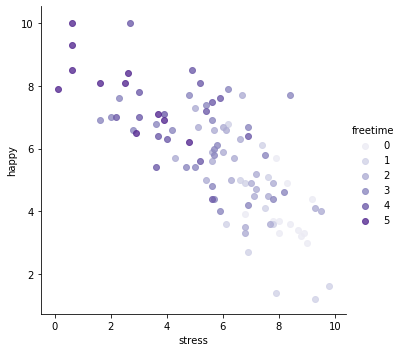

In [25]:
sns.lmplot(x='stress', y='happy', 
           palette='Purples', 
           hue = 'freetime',
           fit_reg=False, 
           data=happiness)

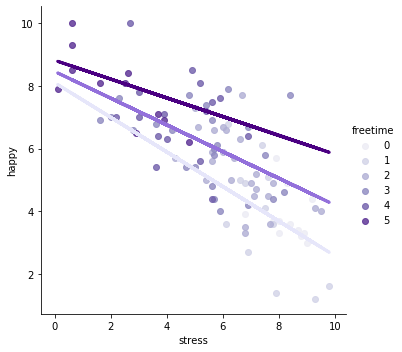

In [27]:
sns.lmplot(x='stress', y='happy', 
           palette='Purples', 
           hue = 'freetime',
           fit_reg=False, 
           data=happiness)
plt.plot(happiness.stress, 
         modelQ.params[0]+modelQ.params[1]*happiness.stress, 
         color='lavender', linewidth=3)

plt.plot(happiness.stress, 
         modelQ.params[0]+modelQ.params[1]*happiness.stress+modelQ.params[2]*3+modelQ.params[3]*happiness.stress*3, 
         color='mediumpurple', linewidth=3)
 
plt.plot(happiness.stress, 
         modelQ.params[0]+modelQ.params[1]*happiness.stress+modelQ.params[2]*6+modelQ.params[3]*happiness.stress*6, 
         color='indigo', linewidth=3)

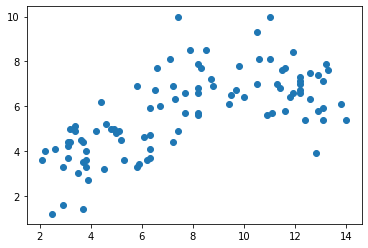

In [29]:
plt.scatter(happiness.sleep, happiness.happy)
plt.show()

In [31]:
modelP = sm.OLS.from_formula('happy ~ sleep + np.power(sleep,2)', data=happiness).fit()
print(modelP.params)

Intercept            -0.058995
sleep                 1.320429
np.power(sleep, 2)   -0.061827
dtype: float64


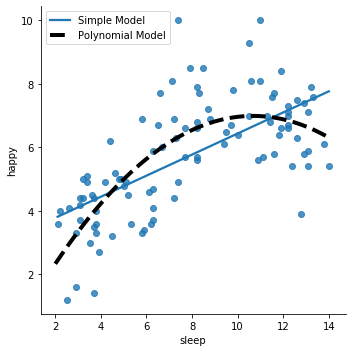

In [32]:
sns.lmplot(x='sleep', y='happy', ci=None, data=happiness)
x=np.linspace(2,14,100)
y=modelP.params[0]+modelP.params[1]*x+modelP.params[2]*np.power(x,2)
 
plt.plot(x, y, linestyle='dashed', linewidth=4, color='black')
plt.legend(['Simple Model','Polynomial Model'])
plt.show()